# Optimize with SciPy

Say hello to [SciPy](https://www.scipy.org/), a powerful library used for mathematics in Python

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

## Local Optimization

In our previous exercise, we saw the importance of finding the minimum of a given function - for instance, `RMSE = f(intercept_coef, slope_coef)`, and the two main approaches possible: iterative approaches (such as gradient descent) and closed-formed (such as matrix inversion).

Let's discover the [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html) library to find the **local** minimium of a function in a few lines of code

In [4]:
# Import optimize
# $DELETE_BEGIN
from scipy import optimize
# $DELETE_END

### 1D-function

Suppose a given function f

In [5]:
def f(x):
    return (x**2 - 20 * np.cos(x))

❓ Plot it below between -10 and +10

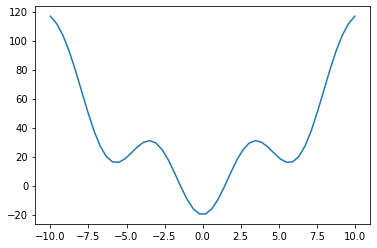

In [6]:
x = np.linspace(-10,10,50)
plt.plot(x, f(x))

❓ Find the local minimum of f, from a starting point `x0`, using `scipy.optimize.minimize()`

In [7]:
optimize.minimize(f, x0=8)


      fun: 15.791736781359305
 hess_inv: array([[0.05417293]])
      jac: array([4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([5.6792078])

❓ Notice the minimum found in variable `x`, and the number of iterations it took to converge: `nit`. What can you conclude?  
Try to change the `x0`!

<details>
    <summary>👉 Explanations</summary>
After <code>nit</code> iterations, the algorithm of the <code>minimize()</code> function gets stuck on a local minimum <code>x</code>, except if it starts from values of <code>x0</code> close enough to the global minimum (0). The value of the local minimum found is <code>fun</code>
    
In math, we say that this function is not [convex](https://en.wikipedia.org/wiki/Convex_function). If it were convex, any minimum would be the global minimum! In fact, machine-learning loves convexity, and such problems are very easy to solve with iterative processes such as gradient descent.
</details>


### 2D-function

As we saw in previous exercise, finding the minimum of a function with more than one parameter becomes rapidly complex. Let's try out:

In [0]:
def g(X):
    return -(X[1] + 47) * np.sin(np.sqrt(abs(X[0]/2 + (X[1]  + 47)))) \
        -X[0] * np.sin(np.sqrt(abs(X[0] - (X[1]  + 47))))

Run the cell below to visualize `g` in 3D

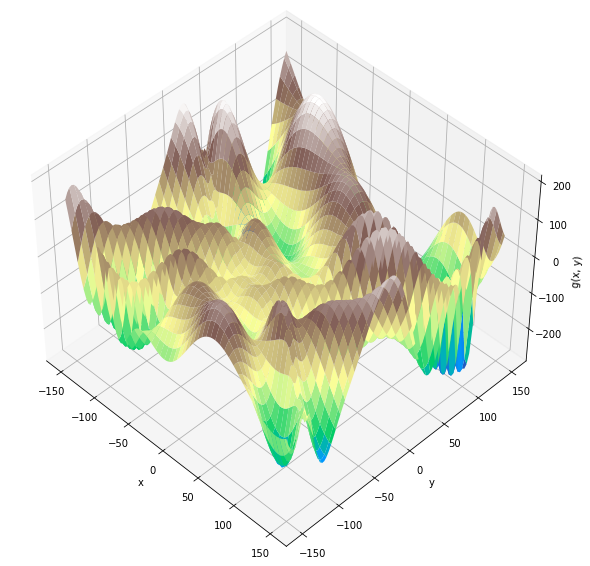

In [0]:
# Build a (50*50) meshgrid
x = np.linspace(-150,150,100) # shape(100,1)
y = np.linspace(-150,150,100) # shape(100,1)
xx, yy = np.meshgrid(x,y) # x and y of shape(100,100)
zz = np.array([xx, yy]) # (2, 100, 100)

# Compute Z, a 2D-array containing g(x,y) for each (x,y) in the meshgrid
Z = g(zz)

# Plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, Z, cmap='terrain')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('g(x, y)'); ax.view_init(45, -45);
plt.show()

❓Initialize a starting point `X0`

In [0]:
X0 = np.array([0,0])
X0.shape

(2,)

❓Find a `minimum` using `scipy.optimize.minimize()`

In [0]:
# Compute and store the minimum inside a `minimum` variable
# $DELETE_BEGIN
res = optimize.minimize(g, X0)
res
# $DELETE_END

      fun: -66.84371732939562
 hess_inv: array([[ 6.83741293, -1.12985495],
       [-1.12985495,  3.64270015]])
      jac: array([ 3.81469727e-06, -5.72204590e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([ 8.45695943, 15.65090152])

In [0]:
minimum = res.x
minimum

array([ 8.45695943, 15.65090152])

❓Does this look like the absolute minimum? Check it out below

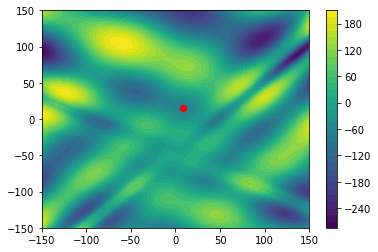

In [0]:
# Try this out

x = np.linspace(-150,150,100) # shape(100,1)
y = np.linspace(-150,150,100) # shape(100,1)
xx, yy = np.meshgrid(x,y) # x and y of shape(100,100)
zz = np.array([xx,yy]) # shape(2, 100, 100)

plt.contourf(xx,yy,g(zz), 40)
plt.colorbar()
plt.scatter(minimum[0], minimum[1], c='r')

You probably only found a **local** minimum to your objective function f, given a starting point $X0$.

❓ Can you think of a procedure that would increase your chance of finding the **global** minima?

See hints below 👇

<details>
    <summary>💡Hints</summary>

👉 One empirical idea is to loop over lots of random starting points $X0$, and store the minimum value found at each run. After each iteration, you increase your chance of finding the global minimum (if there is any).

#### Check your code!

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('minimize2d',
    X0_shape=X0.shape,
    minimum_shape=minimum.shape
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.1, py-1.10.0, pluggy-0.13.1 -- /Users/krokrob/.pyenv/versions/3.8.6/envs/lewagon386/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/krokrob/code/lewagon/data-solutions/03-Maths/01-Algebra-Calculus/03-Scipy
plugins: anyio-2.0.2
collecting ... collected 2 items

tests/test_minimize2d.py::TestMinimize2d::test_minimum_shape PASSED      [ 50%]
tests/test_minimize2d.py::TestMinimize2d::test_starting_point_shape PASSED [100%]

============================== 2 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/minimize2d.pickle

git commit -m 'Completed minimize2d step'

git push origin master


### Minimize under constraint 🔥

In real world problems, we often want to minimize a function $h(\textbf{x})$, **given a set of constraints on the values of $\textbf{x}$ itself**.   

See for instance, the famous [Knapsack problem](https://en.wikipedia.org/wiki/Knapsack_problem) 🎒

As often in Math, the hardest part is not to solve the equations but to convert your real-world problem into mathematical equations. But for the sake of this challenge, let's assume we came with the following problem statement:

---
Find $\textbf{x}$ that minimizes $h(\textbf{x}) = x_1 x_4 (x_1 + x_2 + x_3) + x_3$  

Given the following constraints


$[1]\ \ x_1^2 + x_2^2 + x_3^2 + x_4^2 = 40$  (*equality constraint*)

$[2]\ \ x_1 x_2 x_3 x_4 \leqslant 25$ (*inequality constraint*)

$[3]\ \ 1 \leqslant x_1, x_2, x_3, x_4 \leqslant 5$ (*bounds*)

--- 

❓ Re-use the `minimize` method to find a local minimum using additional arguments as follows: 

`optimize.minimize(h, X0, constraints=cons, bounds=boundaries)`

In [0]:
# Define your objective function h(X) that you want to minimize, X being a 1D-array of lenght 4
def h(X):
    # $CHALLENGIFY_BEGIN
    return X[0] * X[3] * (X[0] + X[1] + X[2]) + X[2]
    # $CHALLENGIFY_END

In [0]:
# Define a function constraint1(X) that returns 0 if and only if equation [1] is True
# Otherwise it should return any other number
def constraint1(X):
    # $CHALLENGIFY_BEGIN
    return X[0] ** 2 + X[1] ** 2 + X[2] ** 2 + X[3] ** 2 - 40.0
    # $CHALLENGIFY_END

# Define a function constraint2(X) that returns a positive number if and only if equation [2] is True
# Otherwise it should return a negative number 
def constraint2(X):
    # $CHALLENGIFY_BEGIN
    return 25.0 - X[0] * X[1] * X[2] * X[3]
    # $CHALLENGIFY_END

<details>
    <summary>💡 Hint</summary>
    The above functions do not require an if else statement if we convert our constraints to Math equations.

</details>

We'll now define for you the "constraint" argument needed for the minimize function. Pay attention to the scipy syntax:

In [0]:
con1 = {"type": "eq", "fun": constraint1}
con2 = {"type": "ineq", "fun": constraint2}
constraints = [con1, con2]

❓ Let's deal with equation [3].
We could write them in the form of 10 constraints functions, but it would be long  
Instead, scipy allows us to create "boundaries" arguments for the variables we look for, in the following form:  
`bounds` = tuple of tuple `((x1_min, x_1_max), (x2_min, x_2_max), ....)`

In [0]:
# Create bounds
# $DELETE_BEGIN
b = (1.0,5.0)
bounds = (b,b,b,b)
# $DELETE_END

In [0]:
# Finally, define any starting point X0 for the minimization algorithm
# $DELETE_BEGIN
X0 = np.array([0,0,0,1])
h(X0)
# $DELETE_END

❓ Now, try to find the minimum of your objective function `f` under such constraints using `optimize.minimize`

In [0]:
# Minimize under constraints
# $DELETE_BEGIN
local_opt = optimize.minimize(h, X0, constraints=constraints, bounds=bounds)
local_opt
# $DELETE_END

     fun: 13.211102550928356
     jac: array([10.60555136,  1.        ,  2.        ,  9.60555136])
 message: 'Optimization terminated successfully'
    nfev: 36
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([1.        , 5.        , 3.60555128, 1.        ])

In [0]:
# Store the minimum in a `local_minimum` variable
# $DELETE_BEGIN
local_minimum = local_opt.x
local_minimum
# $DELETE_END

array([1.        , 5.        , 3.60555128, 1.        ])

In [0]:
# Check constraints
# $DELETE_BEGIN
np.sum(local_opt.x ** 2)
# $DELETE_END

40.00000000000135

#### Check your code!

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('minimize_constraints',
    bounds=bounds,
    X0=X0,
    Xmin=local_minimum
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.1, py-1.10.0, pluggy-0.13.1 -- /Users/krokrob/.pyenv/versions/3.8.6/envs/lewagon386/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/krokrob/code/lewagon/data-solutions/03-Maths/01-Algebra-Calculus/03-Scipy
plugins: anyio-2.0.2
collecting ... collected 6 items

tests/test_minimize_constraints.py::TestMinimizeConstraints::test_bounds_values PASSED [ 16%]
tests/test_minimize_constraints.py::TestMinimizeConstraints::test_first_constraint PASSED [ 33%]
tests/test_minimize_constraints.py::TestMinimizeConstraints::test_minimum_shape PASSED [ 50%]
tests/test_minimize_constraints.py::TestMinimizeConstraints::test_second_constraint PASSED [ 66%]
tests/test_minimize_constraints.py::TestMinimizeConstraints::test_starting_point_shape PASSED [ 83%]
tests/test_minimize_constraints.py::TestMinimizeConstraints::test_third_constraint PASSED [100%]

==========================

## Global Optimization

As discussed, `scipy.optimize.minimize` only finds  the local minima **in the vicinity of X0**. To find the **global** minima, you basically have two options:

1. Prove mathematically that your optimization problem is geometrically [convex](https://en.wikipedia.org/wiki/Convex_function). An optimization problem is convex in the following case: (i) its objective function `h` is a convex function, (ii) the inequality constraints are convex, and (iii) the equality constraints are affine. Read in this excellent math-based presentation from Berkeley if you want to dig further: [Convex Optimization for Machine Learning](https://people.eecs.berkeley.edu/~jordan/courses/294-fall09/lectures/optimization/slides.pdf)


2. Loop over lots of starting points $X0$ and look for local minima nearby. Store the minimum value found at each run. After each iteration, you increase your chance of finding the global minimum.

Option 2 is exactly what the following scipy libraries do under the hood: they _efficiently_ search the parameter space, while using `minimize` at each iteration. It works great when the number of parameters to search for (degree of freedom) is small ([`scipy.optimize.shgo`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.shgo.html#scipy.optimize.shgo) or [`scipy.optimize.dual_annealing`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.dual_annealing.html))

However, they only return a "global" minima **within specified boundaries** for the parameters



❓Try to use the two functions to find the global minima for our previous 2D-function $g(x,y)$, bounded between -150 and +150

In [0]:
# Define a variable `bounds` with boundaries
# $DELETE_BEGIN
bounds = [(-150, 150), (-150, 150)]
# $DELETE_END

In [0]:
# Compute the global minimum `minimum_shgo` with the scipy.optimize.shgo method
# $DELETE_BEGIN
global_opt = optimize.shgo(g, bounds)
print(global_opt)
minimum_shgo = global_opt.x
minimum_shgo
# $DELETE_END

     fun: -203.18194706673154
    funl: array([-203.18194707])
 message: 'Optimization terminated successfully.'
    nfev: 46
     nit: 2
   nlfev: 41
   nlhev: 0
   nljev: 10
 success: True
       x: array([ 122.82902082, -130.64007668])
      xl: array([[ 122.82902082, -130.64007668]])


array([ 122.82902082, -130.64007668])

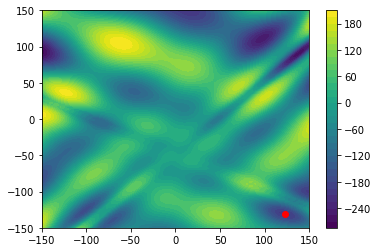

In [0]:
# Try this out

x = np.linspace(-150,150,100) # shape(100,1)
y = np.linspace(-150,150,100) # shape(100,1)
xx, yy = np.meshgrid(x,y) # x and y of shape(100,100)
zz = np.array([xx,yy]) # shape(2, 100, 100)

plt.contourf(xx,yy,g(zz), 40)
plt.colorbar()
plt.scatter(minimum_shgo[0], minimum_shgo[1], c='r')

In [0]:
# Compute the global minimum `minimum_dual` with the scipy.optimize.dual_annealing method
# $DELETE_BEGIN
global_opt = optimize.dual_annealing(g, bounds)
print(global_opt)
minimum_dual = global_opt.x
minimum_dual
# $DELETE_END

     fun: -282.38936611825363
 message: ['Maximum number of iteration reached']
    nfev: 4121
    nhev: 0
     nit: 1000
    njev: 40
  status: 0
 success: True
       x: array([-150.        ,   93.40649112])


array([-150.        ,   93.40649112])

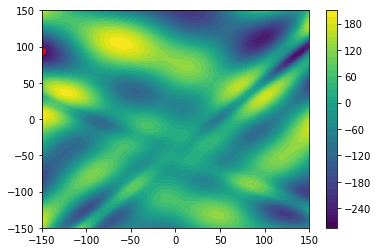

In [0]:
# Try this out

x = np.linspace(-150,150,100) # shape(100,1)
y = np.linspace(-150,150,100) # shape(100,1)
xx, yy = np.meshgrid(x,y) # x and y of shape(100,100)
zz = np.array([xx,yy]) # shape(2, 100, 100)

plt.contourf(xx,yy,g(zz), 40)
plt.colorbar()
plt.scatter(minimum_dual[0], minimum_dual[1], c='r')

### Check your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('global_optimization',
    bounds=bounds,
    Xmin_shgo=minimum_shgo,
    Xmin_dual=minimum_dual
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.1, py-1.10.0, pluggy-0.13.1 -- /Users/krokrob/.pyenv/versions/3.8.6/envs/lewagon386/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/krokrob/code/lewagon/data-solutions/03-Maths/01-Algebra-Calculus/03-Scipy
plugins: anyio-2.0.2
collecting ... collected 5 items

tests/test_global_optimization.py::TestGlobalOptimization::test_bounds_values PASSED [ 20%]
tests/test_global_optimization.py::TestGlobalOptimization::test_minimum_dual_shape PASSED [ 40%]
tests/test_global_optimization.py::TestGlobalOptimization::test_minimum_dual_values PASSED [ 60%]
tests/test_global_optimization.py::TestGlobalOptimization::test_minimum_shgo_shape PASSED [ 80%]
tests/test_global_optimization.py::TestGlobalOptimization::test_minimum_shgo_values PASSED [100%]

============================== 5 passed in 0.12s ===============================


💯 You can commit your code:

git add tests

## Fit a scatter plot

We often have to fit a scatterplot with a straight line, but it can also happen to look like something else (polynomial, logarithmic etc...)

Consider the dataset below: would you try to fit a linear regression curve to it?

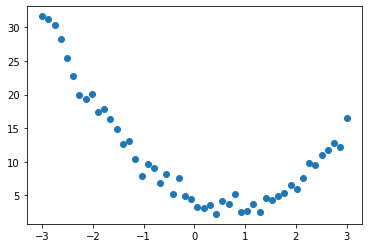

In [0]:
x = np.array([-3.        , -2.87755102, -2.75510204, -2.63265306, -2.51020408,
       -2.3877551 , -2.26530612, -2.14285714, -2.02040816, -1.89795918,
       -1.7755102 , -1.65306122, -1.53061224, -1.40816327, -1.28571429,
       -1.16326531, -1.04081633, -0.91836735, -0.79591837, -0.67346939,
       -0.55102041, -0.42857143, -0.30612245, -0.18367347, -0.06122449,
        0.06122449,  0.18367347,  0.30612245,  0.42857143,  0.55102041,
        0.67346939,  0.79591837,  0.91836735,  1.04081633,  1.16326531,
        1.28571429,  1.40816327,  1.53061224,  1.65306122,  1.7755102 ,
        1.89795918,  2.02040816,  2.14285714,  2.26530612,  2.3877551 ,
        2.51020408,  2.63265306,  2.75510204,  2.87755102,  3.        ])
y = np.array([31.66815357, 31.26229494, 30.3467807 , 28.2057809 , 25.47674964,
       22.81398414, 19.93953021, 19.38250362, 20.02551935, 17.44468883,
       17.80733403, 16.29808282, 14.85006259, 12.69760597, 13.04075803,
       10.42420089,  7.91118094,  9.72737214,  9.05962483,  6.89984054,
        8.15068899,  5.15772899,  7.65448235,  4.95987628,  4.4284636 ,
        3.22183541,  3.05456124,  3.49253584,  2.23478284,  4.15163314,
        3.68063488,  5.22556445,  2.47139029,  2.66785497,  3.72557952,
        2.56255802,  4.61385762,  4.28234911,  4.91138639,  5.31724926,
        6.52053679,  5.94175001,  7.5368359 ,  9.78905172,  9.5795072 ,
       10.95610291, 11.73051576, 12.85008617, 12.2184079 , 16.52977769])
plt.scatter(x,y)

A polynomial estimator of degree 2 seems more appropriate in this case

In [0]:
# define the function f of degree two with parameters (a,b,c)
def f(x,a,b,c):
    # $CHALLENGIFY_BEGIN
    return (a * x**2 + b*x + c)
    # $CHALLENGIFY_END

You need to find the best params (a,b,c). We could again reuse the `optimize.minimize` method to minimize the mean square error between our estimator $f$ and our scatter plot...

Fortunately, the handy method [`scipy.optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) does just that in one line

In [0]:
# Try it out
optimize.curve_fit(f, x, y)

(array([ 2.17083046, -3.0087075 ,  4.31968534]),
 array([[ 2.83060958e-03,  5.70112271e-12, -8.83843408e-03],
        [ 5.70112271e-12,  7.06225905e-03, -7.15333106e-11],
        [-8.83843408e-03, -7.15333106e-11,  4.96491035e-02]]))

The first array contains coefficients that have been computed to minimize square errors between $f$ and the dataset  .
The second array contains the matrix of covariance.

❓Plot your quadratic estimator on top of the scatter plot to check that it fits!

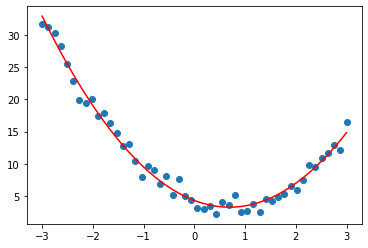

In [0]:
# $CHALLENGIFY_BEGIN
coefs = optimize.curve_fit(f, x, y)[0]
estimator_best = f(x, coefs[0], coefs[1], coefs[2])
plt.scatter(x,y)
plt.plot(x, estimator_best, c='r')
# $CHALLENGIFY_END

## Interpolate

As with any spreadsheet softwares, we often want to quickly fill the blanks in a series of datapoints. We'll use [`scipy.interpolate`](https://docs.scipy.org/doc/scipy/reference/interpolate.html)

In [0]:
from scipy import interpolate

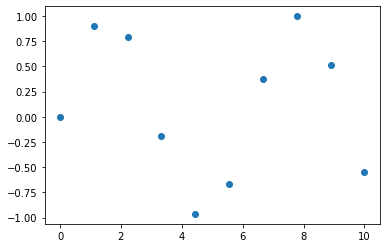

In [0]:
# Let's consider the following scatterplot
x = np.linspace(0, 10, 10)
y = np.array([ 0.        ,  0.8961922 ,  0.79522006, -0.19056796, -0.96431712,
       -0.66510151,  0.37415123,  0.99709789,  0.51060568, -0.54402111])
plt.scatter(x, y)

We can use the `interpolate.interp1d()` method to create a continuous function for any value $x$ in this range

In [0]:
f_interpolated = interpolate.interp1d(x,y, kind='linear')
f_interpolated

You can now call your interpolated function with any continuous values for $x$ in the initial range. Vizualize it with a new plot and a denser `linspace`for x. Feel free to try other `kind` of interpolations such as `quadratic` or `cubic`

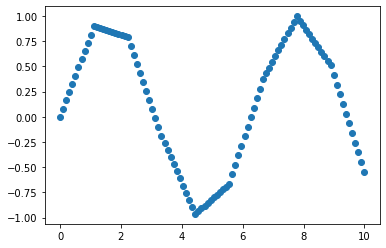

In [0]:
# YOUR PLOT HERE
# $DELETE_BEGIN
x_new = np.linspace(0,10,100)
plt.scatter(x_new, f_interpolated(x_new))
# $DELETE_END